### Titanic dataset analysis with Python and Pandas

Importing Python modules:

In [1]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

Get titanic data as a pandas DataFrame:

In [2]:
tdf = pd.read_csv("titanic_data.csv")

Preview the data:

In [3]:
tdf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


###     Additional description:

     PassengerId     Id
     Survived        Survival
                    (0 = No; 1 = Yes)
     pclass          Passenger Class
                     (1 = 1st; 2 = 2nd; 3 = 3rd)
     name            Name
     sex             Sex
     age             Age
     sibsp           Number of Siblings/Spouses Aboard
     parch           Number of Parents/Children Aboard
     ticket          Ticket Number
     fare            Passenger Fare
     cabin           Cabin
     embarked        Port of Embarkation
                     (C = Cherbourg; Q = Queenstown; S = Southampton)


In [4]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Questions:

     1. What contributed to survival rate



Dataset consists of 12 columns, 891 rows.

#### Variable actions:

    PassengerId    891 int64 - this one does match dataframe row number, not useful (drop)
    Survived       891 int64 - calculate relation of other variables to this 
    Pclass         891 int64 - not sure how those passenger classes were decided, probably this data is not that useful (drop)
    Name           891 object - I do not see any statistical use of this (and we have relatives data) (drop)
    Sex            891 object - values to be represented as int (convert) 
    Age            714 float64 - this one has missing values, would be reasonable to fill them in with median,
                        convert to int (fill)
    SibSp and Parch    891 int64 - why not add them up for one Relatives column (merge) 
    Ticket         891 object - we could only guess what these number differences represent (drop)
    Fare           891 float64 - convert to int
    Cabin          204 object - would be useful if we knew actual placement of those and there weren't that many missing va-
                            -lues (drop)
    Embarked       889 object - 2 values missing, represent as int (fill, convert)

#### Limitations, missing variables:
    1. No distinction between passengers and the crew of the ship.
    2. Cabin placement / distance to lifeboats at the moment of tragedy is not present.
    

Drop not used columns

Convert 'Sex' values to integer, female = 0, male = 1

In [5]:
tdf['Sex'] = tdf['Sex'].map( {'female': 0, 'male': 1} ).astype(int)


Fill in missing Embarked values and convert them to integer

In [6]:
tdf['Embarked'].fillna('S', inplace=True)

tdf['Embarked'] = tdf['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [7]:
# create empty matrix for further Sex/Pclass age median fill
median_ages = np.zeros((2,3))

# calculate median for each Sex/Pclass pair
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = tdf[(tdf['Sex'] == i) & \
                              (tdf['Pclass'] == j+1)]['Age'].dropna().median()
        
# fill NaN values with calculated ones        
for i in range(0, 2):
    for j in range(0, 3):
        tdf.loc[ (tdf.Age.isnull()) & (tdf.Sex == i) & (tdf.Pclass == j+1),\
                'Age'] = median_ages[i,j]

In [8]:
tdf['Relatives'] = tdf['SibSp'] + tdf['Parch']


In [9]:
tdf = tdf.drop(['PassengerId','Name','Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1)

In [10]:
tdf.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.112424,32.204208,0.361392,0.904602
std,0.486592,0.836071,0.477990,13.304424,49.693429,0.635673,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.500000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,1.000000,26.000000,14.454200,0.000000,0.000000
75%,1.000000,3.000000,1.000000,36.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000,10.000000


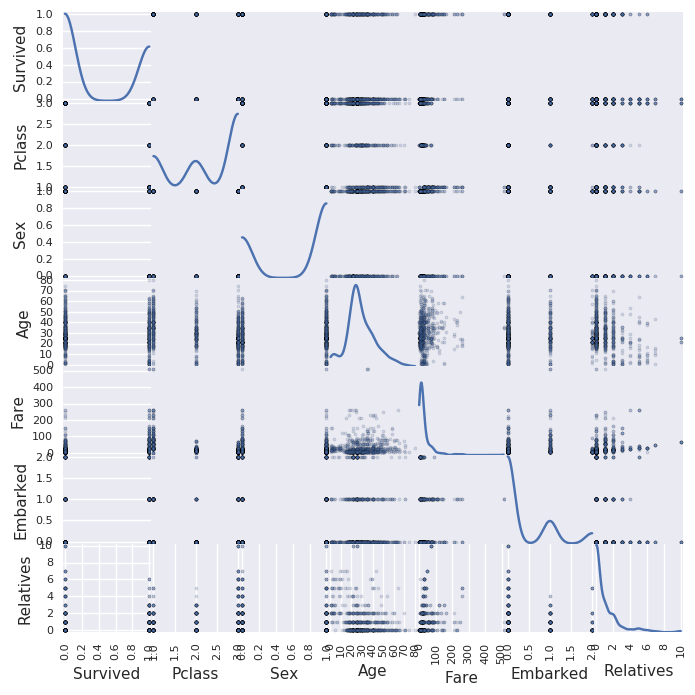

In [11]:
smatrix = scatter_matrix(tdf, alpha=0.2, figsize=(8, 8), diagonal='kde')

In [12]:

fare, pclass = pd.Series(tdf['Fare']), pd.Series(tdf['Pclass'])
print (pclass.corr(fare, 'pearson'), 'correlation')



-0.549499619944 correlation


In [13]:
# tdf.apply(lambda x: (x - x.mean()) / x.std())
# fare = (fare - fare.mean()) / fare.std()
# tdf['Fare'] = fare
# # Format float numbers display to 2 numbers after decimal point
# pd.options.display.float_format = '{:,.2f}'.format

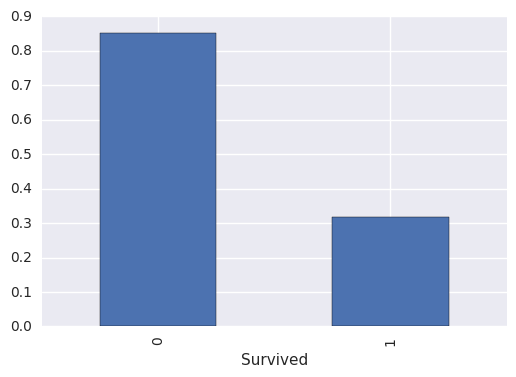

In [33]:
# Showing family (1) mean bars for people who survived and did not
tdf.groupby('Survived').mean()['Sex'].plot(kind='bar')
# Survivers a lot more frequently had relatives on board

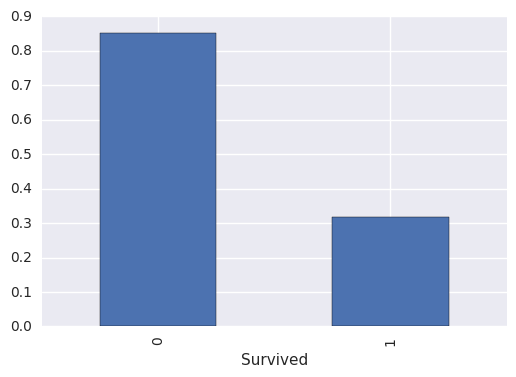

In [22]:
# Same for age (2)
tdf.groupby('Survived').mean()['Sex'].plot(kind='bar')
# Average age of survivers is only a bit lower (2 years)

Survived
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

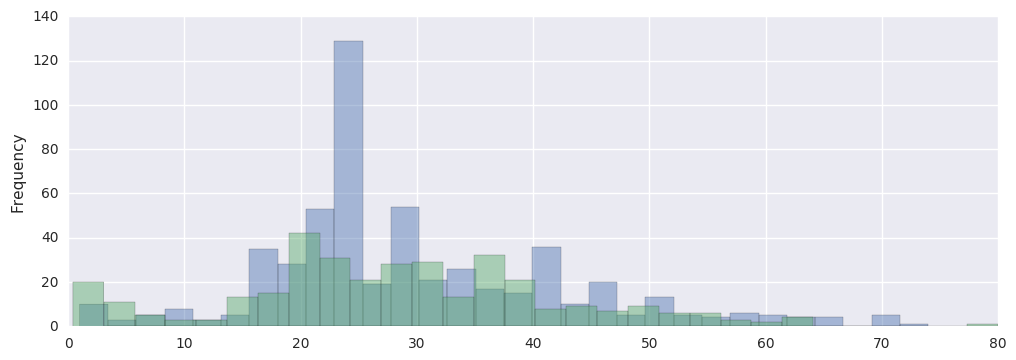

In [16]:
# More detailed age histogram
# shows many victims to be 16 to 25 years old or have
# missing age values (29 years mode peak given by filling in mean values instead)

age = tdf.groupby('Survived')['Age']
age.plot(kind='hist', bins=30, alpha=0.44, figsize=(12,4))

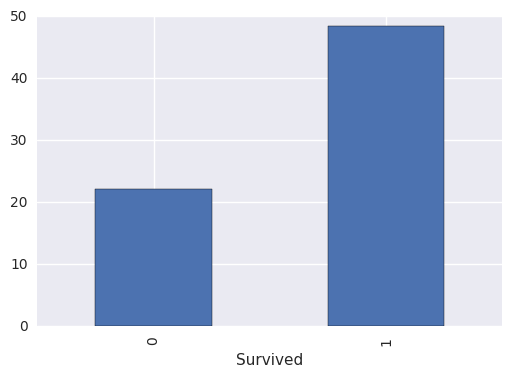

In [17]:
# and wealth (3)
# Mean wealth is significantly higher for survivers 
tdf.groupby('Survived').mean()['Fare'].plot(kind='bar')

In [18]:
# Conclusion:
# Survivers tended to be wealthy, also tended to have relatives among passengers